# Importing libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [78]:
%matplotlib inline

In [79]:
df = pd.read_csv('ds/economic_indicators.csv')[:-5]
df_inflation = pd.read_csv('ds/inflation_cp.csv')[:-5]

# Load dataset

In [80]:
df.head()

,Country Name,Country Code,Series Name,Series Code,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Philippines,PHL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,5.860348e+00,5.186412e+00,-5.140906e-01,3.346451e+00,4.382505e+00,3.049232e+00,...,6.896952e+00,6.750531e+00,6.347987e+00,6.348310e+00,7.149457e+00,6.930988e+00,6.341486e+00,6.118526e+00,-9.518295e+00,5.703156e+00
1,Philippines,PHL,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,3.331903e+00,2.620545e+00,-2.882087e+00,9.648508e-01,2.094019e+00,8.907429e-01,...,5.049330e+00,4.964801e+00,4.642336e+00,4.587218e+00,5.265571e+00,5.064393e+00,4.548701e+00,4.376526e+00,-1.097819e+01,4.135109e+00
2,Philippines,PHL,"Population, total",SP.POP.TOTL,7.094497e+07,7.271884e+07,7.449192e+07,7.624906e+07,7.795822e+07,7.962609e+07,...,9.803232e+07,9.970011e+07,1.013252e+08,1.030314e+08,1.048753e+08,1.067385e+08,1.085688e+08,1.103808e+08,1.121910e+08,1.138803e+08
3,Philippines,PHL,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.608000e+00,3.630000e+00,3.828000e+00,3.691000e+00,3.655000e+00,3.700000e+00,...,3.500000e+00,3.500000e+00,3.600000e+00,3.070000e+00,2.700000e+00,2.550000e+00,2.340000e+00,2.240000e+00,2.520000e+00,2.632000e+00
4,Myanmar,MMR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.686900e+00,6.034804e+00,5.761847e+00,8.478034e+00,1.241819e+01,1.246773e+01,...,6.485754e+00,7.898669e+00,8.199664e+00,3.277279e+00,1.050778e+01,5.750064e+00,6.404977e+00,6.750460e+00,3.173774e+00,-1.791294e+01


In [81]:
total_population = df[df['Series Code'] == 'SP.POP.TOTL'].copy()
df_total_population = total_population.copy()
df_total_population.reset_index(drop=True, inplace=True)
df_total_population.describe()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,4.917922e+07,5.003071e+07,5.087111e+07,5.167475e+07,5.244934e+07,5.321002e+07,5.395795e+07,5.468851e+07,5.541518e+07,5.614099e+07,...,6.136063e+07,6.210168e+07,6.282190e+07,6.353233e+07,6.424270e+07,6.493039e+07,6.559463e+07,6.624538e+07,6.686403e+07,6.739876e+07
std,6.066179e+07,6.163629e+07,6.260292e+07,6.355069e+07,6.446933e+07,6.536972e+07,6.626644e+07,6.716246e+07,6.802110e+07,6.887788e+07,...,7.529120e+07,7.621848e+07,7.711782e+07,7.799683e+07,7.885357e+07,7.968671e+07,8.049564e+07,8.128764e+07,8.202070e+07,8.265863e+07
min,3.061960e+05,3.132150e+05,3.201520e+05,3.270450e+05,3.339260e+05,3.407480e+05,3.474630e+05,3.540450e+05,3.604610e+05,3.667170e+05,...,4.066340e+05,4.117020e+05,4.166560e+05,4.214370e+05,4.259940e+05,4.302760e+05,4.342740e+05,4.380480e+05,4.417250e+05,4.453730e+05
25%,6.578588e+06,6.720796e+06,6.852461e+06,6.979794e+06,7.102850e+06,7.224328e+06,7.345020e+06,7.463726e+06,7.580218e+06,7.701373e+06,...,8.578262e+06,8.700477e+06,8.821295e+06,8.944945e+06,9.074668e+06,9.206110e+06,9.335064e+06,9.460976e+06,9.588764e+06,9.716048e+06
50%,3.205621e+07,3.261061e+07,3.316336e+07,3.370515e+07,3.424174e+07,3.477867e+07,3.531134e+07,3.583185e+07,3.633585e+07,3.682400e+07,...,3.993920e+07,4.039157e+07,4.083945e+07,4.127639e+07,4.170938e+07,4.213207e+07,4.253264e+07,4.292212e+07,4.331160e+07,4.368598e+07
75%,6.826150e+07,6.978640e+07,7.130524e+07,7.279746e+07,7.423532e+07,7.563204e+07,7.653738e+07,7.730111e+07,7.806121e+07,7.881191e+07,...,8.426525e+07,8.509545e+07,8.591686e+07,8.671715e+07,8.749666e+07,8.824934e+07,8.896770e+07,8.965948e+07,9.035543e+07,9.100130e+07
max,2.013738e+08,2.046280e+08,2.078555e+08,2.109969e+08,2.140724e+08,2.171124e+08,2.201151e+08,2.230801e+08,2.259386e+08,2.288051e+08,...,2.502227e+08,2.532759e+08,2.562298e+08,2.590920e+08,2.618502e+08,2.644989e+08,2.670668e+08,2.695829e+08,2.718580e+08,2.737532e+08


In [82]:
df_total_population.head()

,Country Name,Country Code,Series Name,Series Code,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Philippines,PHL,"Population, total",SP.POP.TOTL,70944969.0,72718837.0,74491918.0,76249064.0,77958223.0,79626086.0,...,98032317.0,99700107.0,101325201.0,103031365.0,104875266.0,106738501.0,108568836.0,110380804.0,112190977.0,113880328.0
1,Myanmar,MMR,"Population, total",SP.POP.TOTL,43423369.0,43972046.0,44516185.0,45041636.0,45538332.0,46014826.0,...,50218185.0,50648334.0,51072436.0,51483949.0,51892349.0,52288341.0,52666014.0,53040212.0,53423198.0,53798084.0
2,Lao PDR,LAO,"Population, total",SP.POP.TOTL,5043914.0,5150538.0,5246922.0,5340056.0,5430853.0,5519707.0,...,6508803.0,6600742.0,6691454.0,6787419.0,6891363.0,6997917.0,7105006.0,7212053.0,7319399.0,7425057.0
3,Cambodia,KHM,"Population, total",SP.POP.TOTL,11182612.0,11431569.0,11669077.0,11899006.0,12118841.0,12338192.0,...,14786640.0,14999683.0,15210817.0,15417523.0,15624584.0,15830689.0,16025238.0,16207746.0,16396860.0,16589023.0
4,Brunei Darussalam,BRN,"Population, total",SP.POP.TOTL,306196.0,313215.0,320152.0,327045.0,333926.0,340748.0,...,406634.0,411702.0,416656.0,421437.0,425994.0,430276.0,434274.0,438048.0,441725.0,445373.0


#Demographic Profile of ASEAN Countries

# Which ASEAN country has the largest population in the given year?

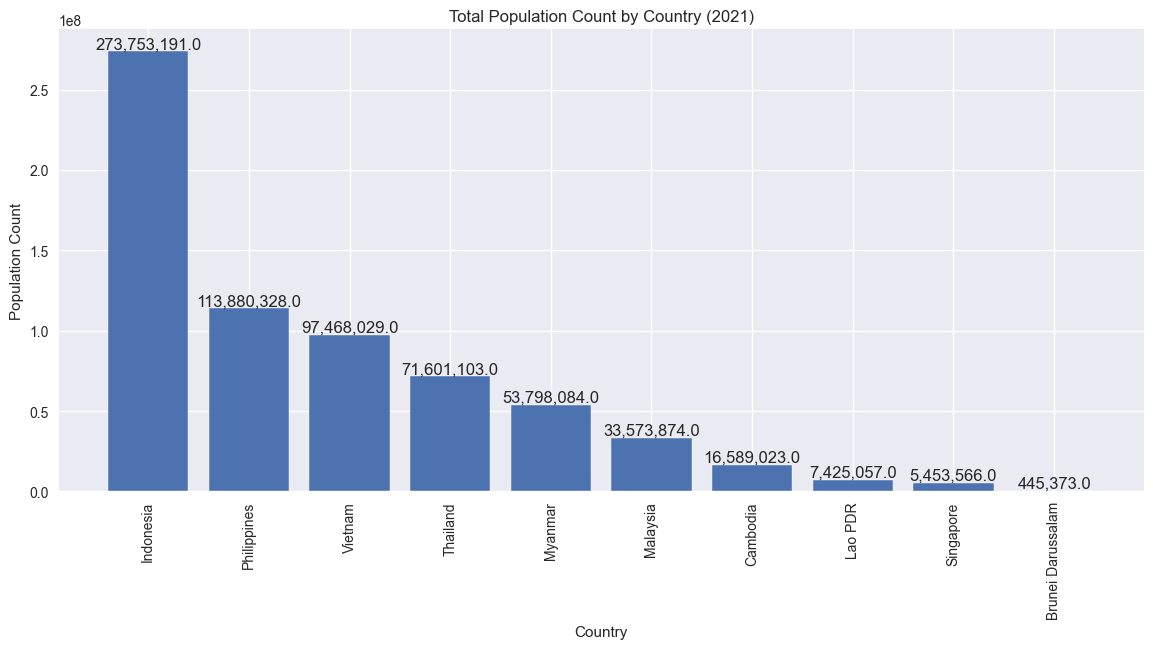

In [83]:
# Filter the data for the year 2021
df_2021 = df_total_population[['Country Name', '2021']]

# Sort the data by the total population in descending order
df_2021_sorted = df_2021.sort_values(by='2021', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 6))

# Create the bar chart
plt.bar(df_2021_sorted['Country Name'], df_2021_sorted['2021'])

# Add text annotations for the population values
for i, value in enumerate(df_2021_sorted['2021']):
    plt.text(i, value, f'{value:,}', ha='center', va='bottom')

# Customize the chart
plt.xlabel('Country')
plt.ylabel('Population Count')
plt.title('Total Population Count by Country (2021)')
plt.xticks(rotation=90)

# Display the chart
plt.show()

# What is the percentage of the population of each ASEAN country in the total population of ASEAN in 2021?

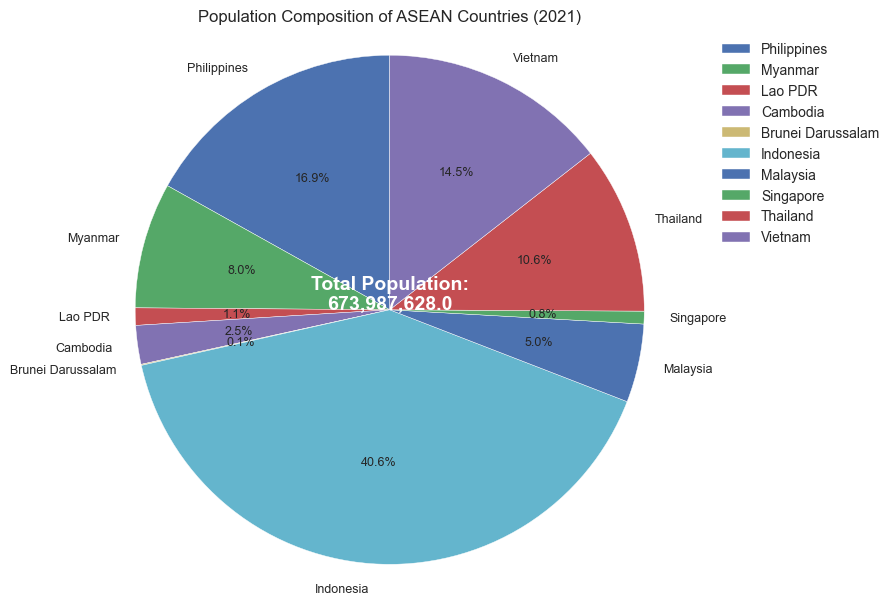

In [84]:
asean_countries = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'Lao PDR', 'Brunei Darussalam', 'Myanmar', 'Cambodia']

asean_data = df_total_population[df_total_population['Country Name'].isin(asean_countries)]

# Calculate total population in year 2021
total_population_2021 = asean_data['2021'].sum()

# Calculate percentage for each country
population_percentages = asean_data['2021'] / total_population_2021 * 100
# pie chart
fig, ax = plt.subplots(figsize=(8, 8))
patches, texts, autotexts = ax.pie(population_percentages, labels=asean_data['Country Name'],
                                   autopct='%1.1f%%', startangle=90, textprops={'fontsize': 9})


ax.text(0, 0, f'Total Population:\n{total_population_2021:,}', fontsize=14, ha='center', color='white', weight='bold')


ax.axis('equal')


legend = ax.legend(patches, asean_data['Country Name'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.setp(legend.get_title(), fontsize=8)  # Adjust legend title font size

# Title
plt.title('Population Composition of ASEAN Countries (2021)')

# Adjust layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.1)
plt.show()

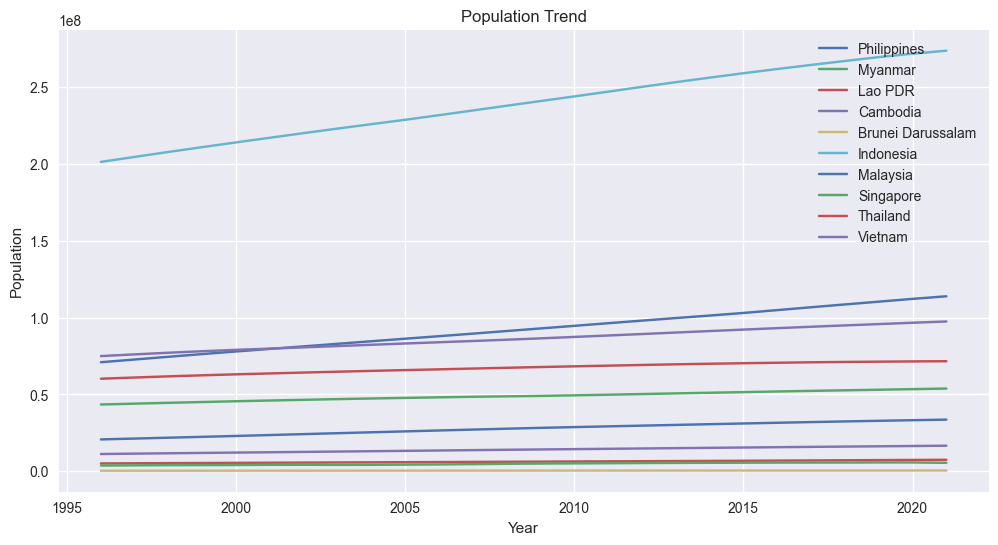

In [85]:
years = df_total_population.columns[4:].astype(int)
population_values = df_total_population.iloc[:, 4:].values

# Create a figure and axis for the line chart with specific size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the line chart
for i in range(population_values.shape[0]):
    country_name = df_total_population['Country Name'].iloc[i]
    ax.plot(years, population_values[i], label=country_name)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Population Trend')

# Add a legend
ax.legend()

plt.show()

#  How has the unemployment rate in the Philippines changed over the years from 1996 to 2021?

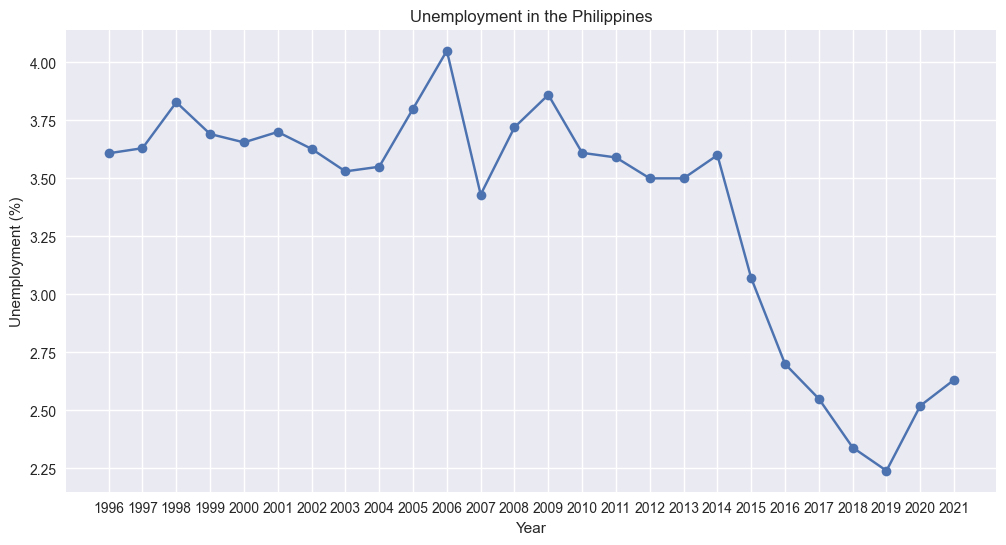

In [86]:
# Filter the data for Philippines
ph_unemployment = df[(df['Country Name'] == 'Philippines') & (df['Series Code'] == 'SL.UEM.TOTL.ZS')]

years = ph_unemployment.columns[4:].tolist()
unemployment = ph_unemployment.values.flatten()[4:]

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size (width, height)

# Plot the line chart
ax.plot(years, unemployment, marker='o', linestyle='-', color='b')

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment (%)')
ax.set_title('Unemployment in the Philippines')
ax.grid(True)

# Display the plot
plt.show()




# Comparing the unemployment rates across different countries in year 2020.

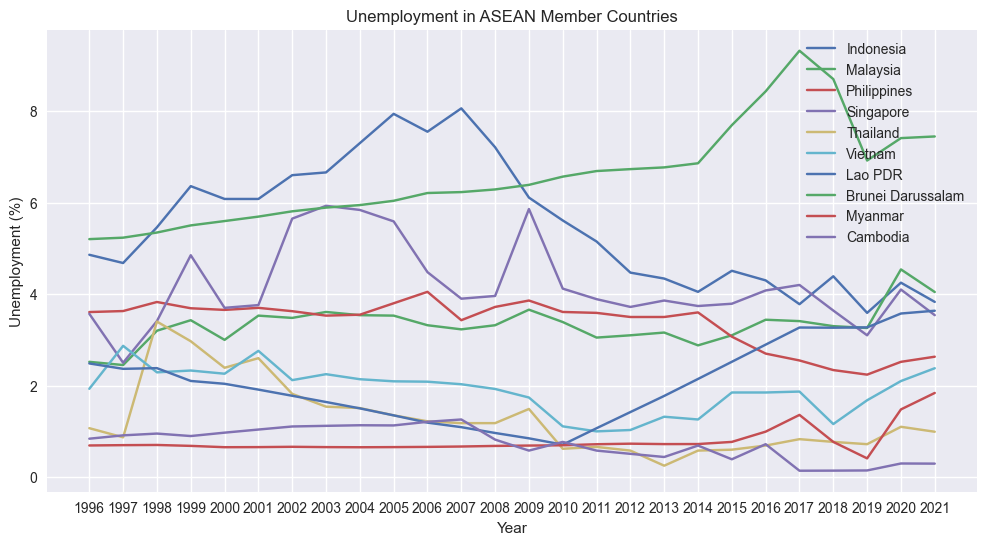

In [87]:
asean_countries = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam','Lao PDR','Brunei Darussalam','Myanmar','Cambodia']

# Filter the DataFrame for ASEAN member countries and unemployment data
asean_unemployment = df[df['Country Name'].isin(asean_countries) & (df['Series Code'] == 'SL.UEM.TOTL.ZS')]

# Iterate over the ASEAN countries and plot the unemployment data
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size (width, height)

for country in asean_countries:
    country_data = asean_unemployment[asean_unemployment['Country Name'] == country]
    years = country_data.columns[4:].tolist()
    unemployment = country_data.values.flatten()[4:]
    ax.plot(years, unemployment, label=country)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment (%)')
ax.set_title('Unemployment in ASEAN Member Countries')
ax.legend()
ax.grid(True)

plt.show()

In [88]:
unemployment = df[df['Series Code'] == 'SL.UEM.TOTL.ZS'].copy()
unemployment_df = unemployment.copy()
unemployment_df.reset_index(drop=True, inplace=True)

In [89]:
unemployment_df

,Country Name,Country Code,Series Name,Series Code,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Philippines,PHL,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.608,3.630,3.828,3.691,3.655,3.700,...,3.500,3.500,3.600,3.070,2.700,2.55,2.340,2.240,2.520,2.632
1,Myanmar,MMR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,0.692,0.699,0.703,0.683,0.654,0.656,...,0.731,0.722,0.723,0.770,0.994,1.36,0.770,0.410,1.480,1.840
2,Lao PDR,LAO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.485,2.367,2.382,2.102,2.040,1.913,...,1.422,1.775,2.146,2.521,2.896,3.27,3.266,3.273,3.576,3.637
3,Cambodia,KHM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,0.840,0.913,0.952,0.898,0.972,1.040,...,0.509,0.440,0.690,0.390,0.720,0.14,0.142,0.146,0.298,0.295
4,Brunei Darussalam,BRN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,5.202,5.234,5.346,5.502,5.597,5.694,...,6.732,6.770,6.860,7.693,8.432,9.32,8.700,6.920,7.410,7.446
5,Indonesia,IDN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.860,4.680,5.460,6.360,6.080,6.080,...,4.470,4.340,4.050,4.510,4.300,3.78,4.390,3.590,4.250,3.830
6,Malaysia,MYS,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.520,2.450,3.200,3.430,3.000,3.530,...,3.100,3.160,2.880,3.100,3.440,3.41,3.300,3.260,4.540,4.046
7,Singapore,SGP,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.570,2.500,3.410,4.850,3.700,3.760,...,3.720,3.860,3.740,3.790,4.080,4.20,3.641,3.100,4.100,3.540
8,Thailand,THA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.070,0.870,3.400,2.970,2.390,2.600,...,0.580,0.250,0.580,0.600,0.690,0.83,0.770,0.720,1.100,0.992
9,Vietnam,VNM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.930,2.870,2.290,2.330,2.260,2.760,...,1.030,1.320,1.260,1.850,1.850,1.87,1.160,1.680,2.100,2.380


# How does the unemployment rate vary across different regions or countries?
#Highlight variations in unemployment rates across countries and years

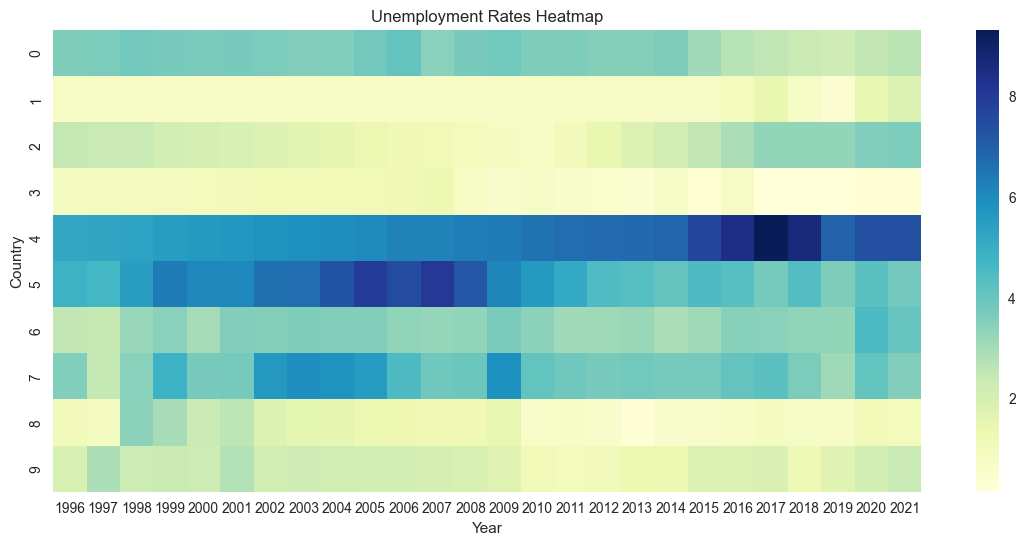

In [90]:
data_heatmap = unemployment_df.iloc[:, 4:]

# figure size
plt.figure(figsize=(14, 6))

# Create the heatmap
sns.heatmap(data_heatmap, cmap='YlGnBu')

# Set the title and labels
plt.title('Unemployment Rates Heatmap')
plt.xlabel('Year')
plt.ylabel('Country')

# Display the heatmap
plt.show()

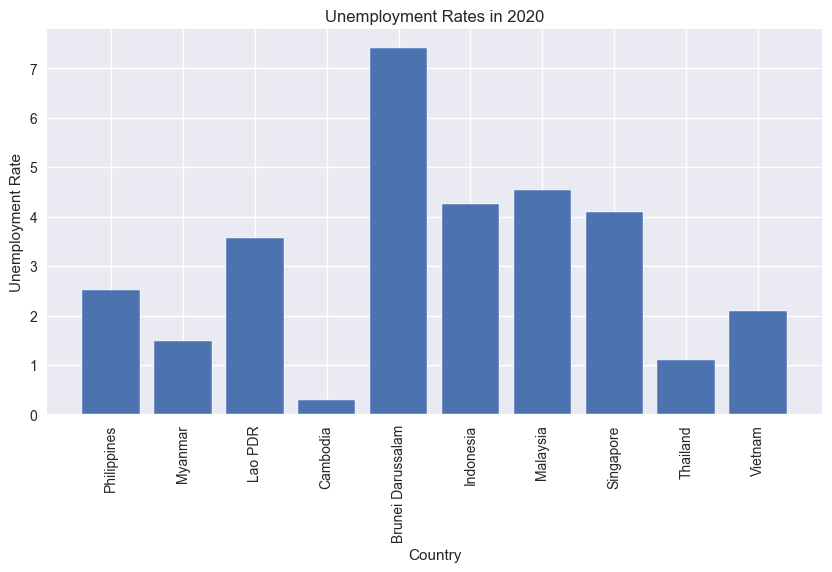

In [91]:
data_2020 = unemployment_df['2020']

# Set the country as the x-axis labels
countries = unemployment_df['Country Name']

# Plotting bar chart
plt.figure(figsize=(10, 5))  # size (w,h)
plt.bar(countries, data_2020)

# title and labels
plt.title('Unemployment Rates in 2020')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate')

# for better readability/ vertical
plt.xticks(rotation=90)

plt.show()

In [92]:
gdp_per_capita = df[df['Series Code'] == 'NY.GDP.PCAP.KD.ZG'].copy()
df_gdp_per_capita = gdp_per_capita.copy()
df_gdp_per_capita.reset_index(drop=True, inplace=True)

In [93]:
df_gdp_per_capita

,Country Name,Country Code,Series Name,Series Code,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Philippines,PHL,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,3.331903,2.620545,-2.882087,0.964851,2.094019,0.890743,...,5.049330,4.964801,4.642336,4.587218,5.265571,5.064393,4.548701,4.376526,-10.978194,4.135109
1,Myanmar,MMR,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,5.352354,4.711717,4.469078,7.212541,11.192023,11.303101,...,5.587393,6.982302,7.301181,2.451781,9.638069,4.949194,5.641937,5.997337,2.434131,-18.484959
2,Lao PDR,LAO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,4.458967,4.659676,2.057762,5.434884,4.029960,4.049070,...,6.491281,6.521647,6.153133,5.753411,5.408586,5.264928,4.646556,3.892448,-0.970941,1.069380
3,Cambodia,KHM,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,3.406143,1.741562,2.550982,10.527532,7.998304,6.225701,...,5.769286,5.831861,5.655377,5.531685,5.516206,5.603875,6.164476,5.848620,-4.213654,1.832958
4,Brunei Darussalam,BRN,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,0.493136,-3.679156,-2.713190,0.880167,0.730069,0.687037,...,-0.359755,-3.330845,-3.667519,-1.522384,-3.521144,0.320205,-0.868860,2.974226,0.291719,-2.396821
5,Indonesia,IDN,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,6.086859,3.034828,-14.475651,-0.709501,3.412714,2.192247,...,4.706703,4.284778,3.796141,3.717745,3.926698,4.017626,4.162984,4.039136,-2.884591,2.973375
6,Malaysia,MYS,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,7.066876,4.493721,-9.743817,3.489407,6.123798,-2.032857,...,3.780489,3.044894,4.373136,3.527534,2.933762,4.325630,3.472767,3.124899,-6.661137,1.944118
7,Singapore,SGP,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,3.190985,4.739927,-5.457987,4.876892,7.165988,-3.703666,...,1.904462,3.133979,2.594723,1.762325,2.226730,4.568751,3.175545,-0.054555,-3.843656,12.196721
8,Thailand,THA,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,4.272297,-3.994106,-8.765115,3.404319,3.421815,2.496284,...,6.554005,2.065309,0.432582,2.644813,2.977158,3.749844,3.886440,1.893854,-6.415842,1.355957
9,Vietnam,VNM,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,7.607800,6.570647,4.297434,3.438781,5.601279,5.106408,...,4.379564,4.423437,5.293391,5.877862,5.618680,5.909238,6.467176,6.392604,1.937355,1.699390


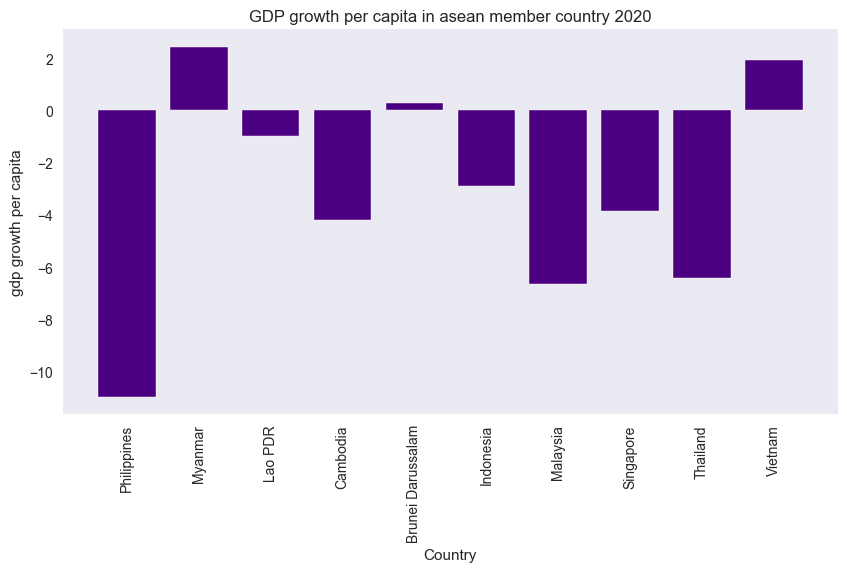

In [94]:
#GDP PER CAPITA IN YEAR 2020

data_2020 = df_gdp_per_capita['2020']

# Set the country as the x-axis labels
countries = df_gdp_per_capita['Country Name']

# Plotting bar chart
plt.figure(figsize=(10, 5))  # size (w,h)
plt.bar(countries, data_2020, color ="indigo")

# title and labels
plt.title('GDP growth per capita in asean member country 2020')
plt.xlabel('Country' )
plt.ylabel('gdp growth per capita')

# for better readability/ vertical
plt.xticks(rotation=90)

plt.grid()
plt.show()

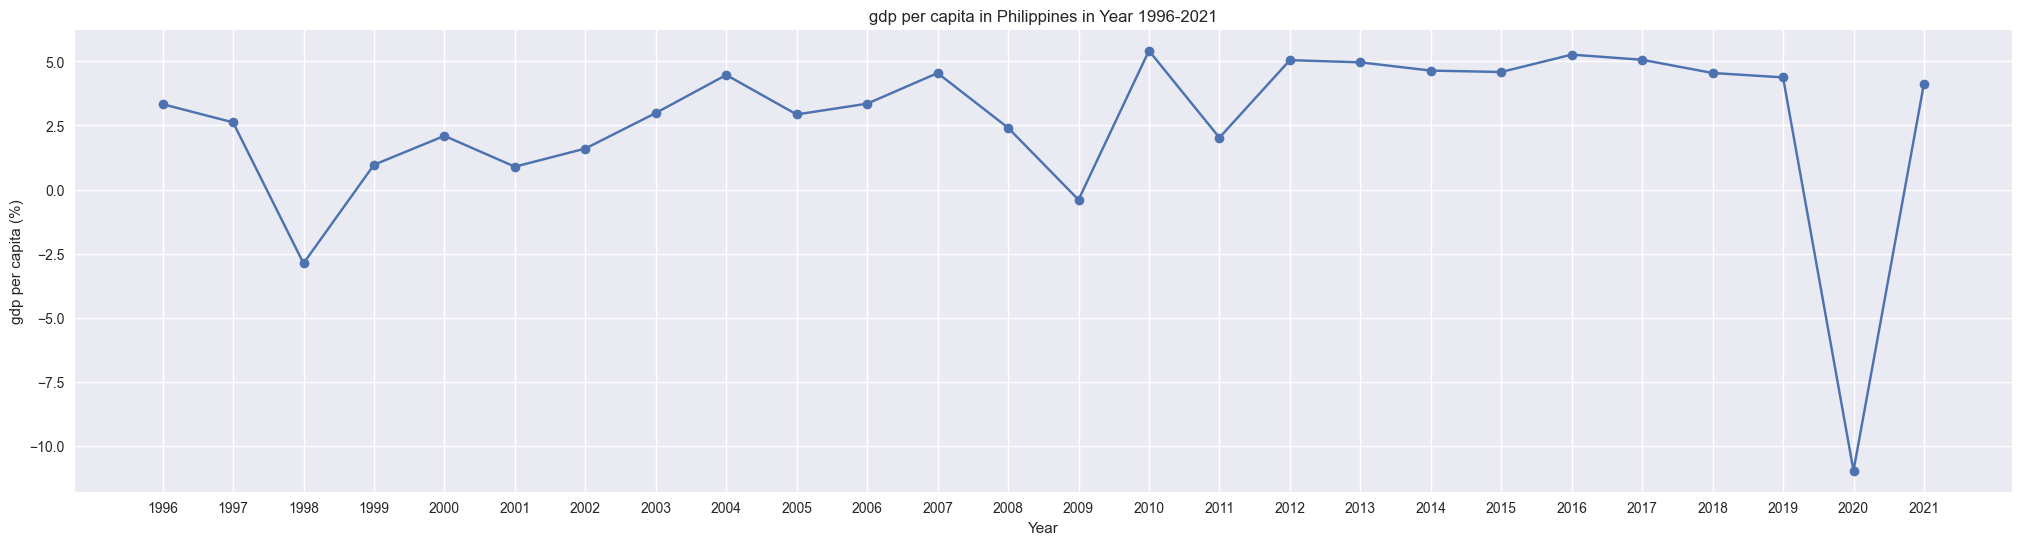

In [95]:
years = df_gdp_per_capita.columns[4:]  # start from the 5th column year
values = df_gdp_per_capita.loc[df_gdp_per_capita['Country Name'] == 'Philippines', years].values.flatten()

fig, ax = plt.subplots(figsize=(25, 6))  # Adjust the size (width, height)

# Plot the line, o for dot, - for solid line, b for color blue
ax.plot(years, values, marker='o', linestyle='-', color='b')

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('gdp per capita (%)')
ax.set_title('gdp per capita in Philippines in Year 1996-2021')
ax.grid(True)

plt.show()

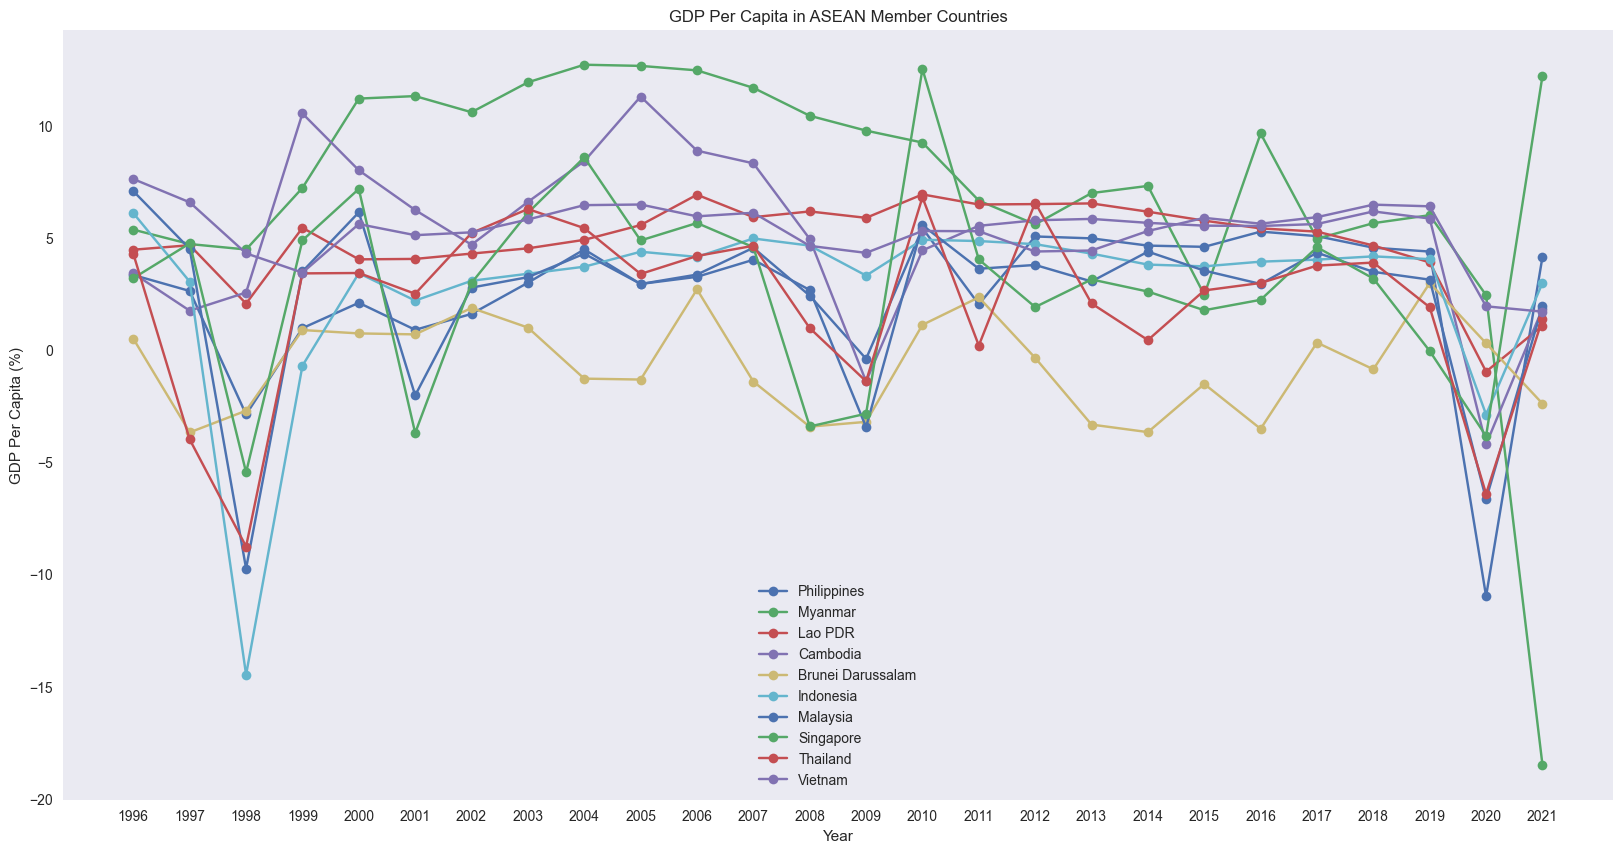

In [96]:
#
fig = plt.figure(figsize=(20, 10))# Adjust the size (width, height)
for index, row in df_gdp_per_capita.iterrows():
    country_name = row['Country Name']
    values = row[4:]  #start from the 5th column
    plt.plot(years, values, label=country_name, marker='o')

# Set title and labels for the plot
plt.title('GDP Per Capita in ASEAN Member Countries')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita (%)')

# Create a legend to distinguish the countries.
plt.legend()
plt.grid()
# Display the plot
plt.show()

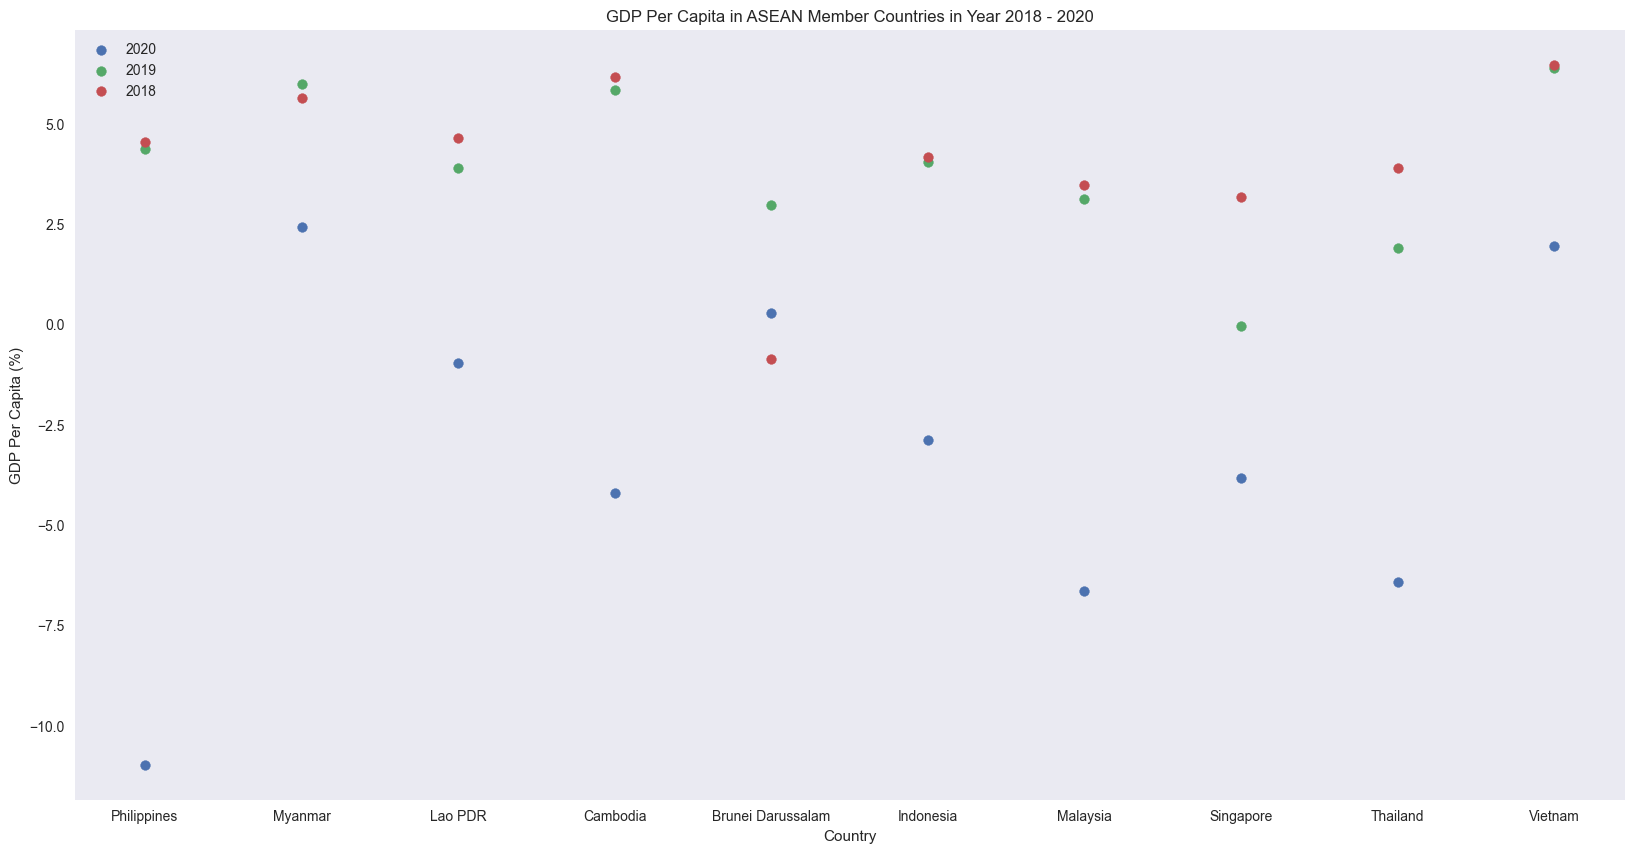

In [97]:
data_2020 = df_gdp_per_capita['2020']
labels = df_gdp_per_capita['Country Name']

fig = plt.figure(figsize=(20, 10))
plt.scatter(labels, data_2020)

data_2019 = df_gdp_per_capita['2019']
labels = df_gdp_per_capita['Country Name']
plt.scatter(labels, data_2019)

data_2018 = df_gdp_per_capita['2018']
labels = df_gdp_per_capita['Country Name']
plt.scatter(labels, data_2018)

plt.title('GDP Per Capita in ASEAN Member Countries in Year 2018 - 2020')
plt.xlabel('Country')
plt.ylabel('GDP Per Capita (%)')
plt.legend(["2020", "2019", "2018"], loc ="upper left")
plt.grid()
plt.show()


# GDP Growth Demographics

In [98]:
gdp_growth= df[df['Series Code'] == 'NY.GDP.MKTP.KD.ZG'].copy()
gdp_growth_df = gdp_growth.copy()
gdp_growth_df.reset_index(drop=True, inplace=True)

In [99]:
gdp_growth_df.head()

,Country Name,Country Code,Series Name,Series Code,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Philippines,PHL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,5.860348,5.186412,-0.514091,3.346451,4.382505,3.049232,...,6.896952,6.750531,6.347987,6.348310,7.149457,6.930988,6.341486,6.118526,-9.518295,5.703156
1,Myanmar,MMR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.686900,6.034804,5.761847,8.478034,12.418192,12.467730,...,6.485754,7.898669,8.199664,3.277279,10.507781,5.750064,6.404977,6.750460,3.173774,-17.912945
2,Lao PDR,LAO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.928324,6.872091,3.967608,7.306376,5.798782,5.751413,...,8.026098,8.026300,7.611963,7.270066,7.022836,6.892531,6.247960,5.457735,0.503032,2.528351
3,Cambodia,KHM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,5.897506,4.006621,4.681632,12.705381,9.993580,8.148386,...,7.313346,7.356665,7.142571,6.965798,6.933314,6.996904,7.469169,7.054107,-3.096007,3.026389
4,Brunei Darussalam,BRN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.878318,-1.471172,-0.558509,3.052157,2.849422,2.744041,...,0.912842,-2.126029,-2.508353,-0.392384,-2.477918,1.328603,0.052238,3.869110,1.133573,-1.590762


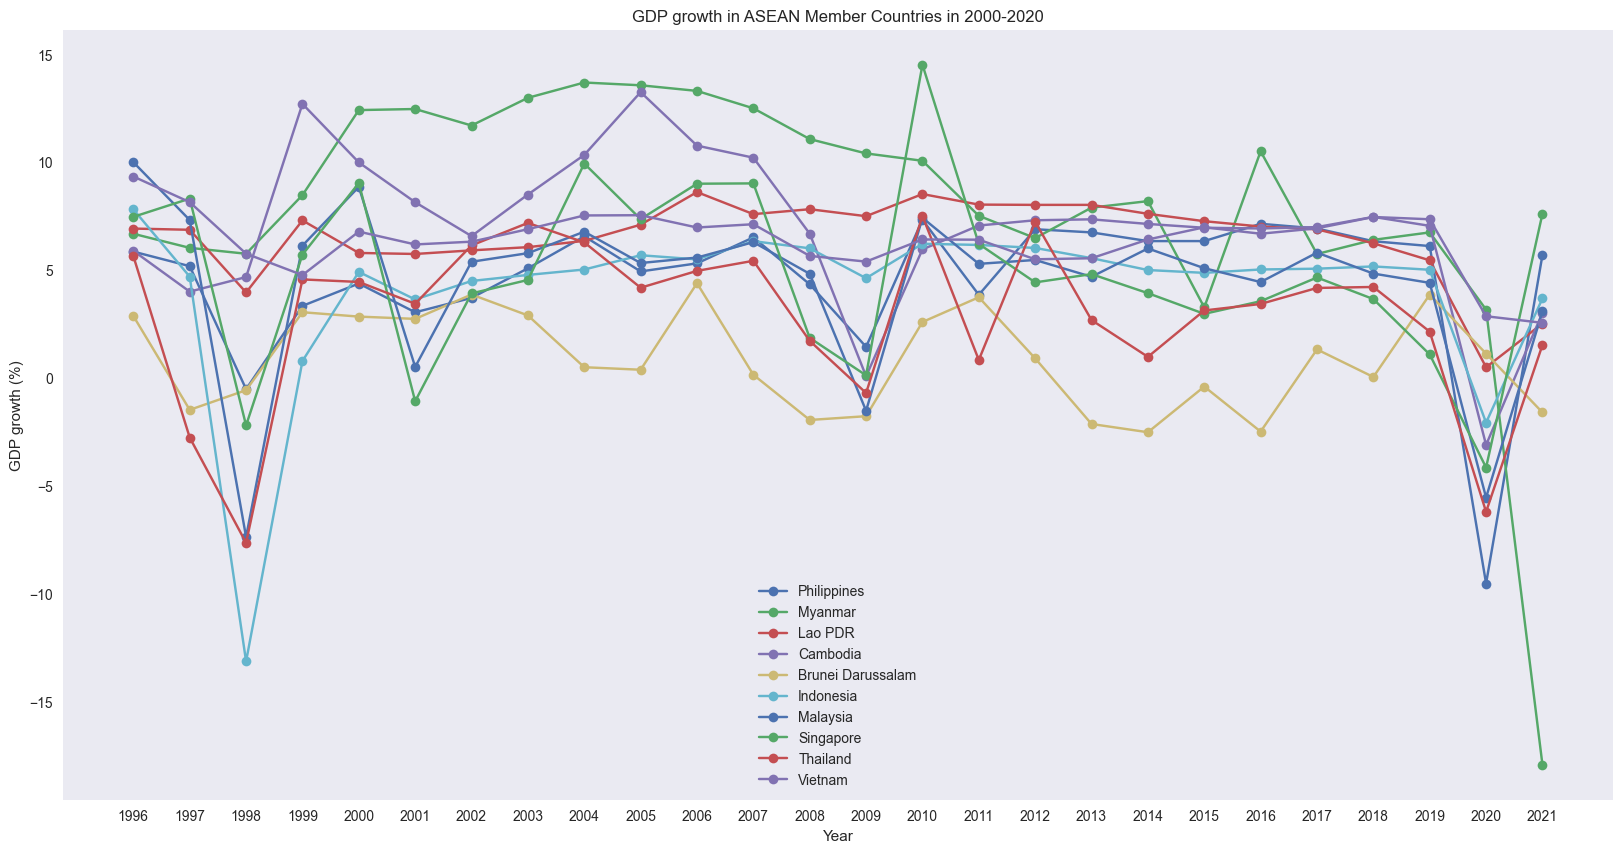

In [100]:
#
fig = plt.figure(figsize=(20, 10))# Adjust the size (width, height)
for index, row in gdp_growth_df.iterrows():
    country_name = row['Country Name']
    values = row[4:]  #start from the 5th column
    plt.plot(years, values, label=country_name, marker='o')

# Set title and labels for the plot
plt.title('GDP growth in ASEAN Member Countries in 2000-2020')
plt.xlabel('Year')
plt.ylabel('GDP growth (%)')

# Create a legend to distinguish the countries.
plt.legend()
plt.grid()
# Display the plot
plt.show()

#  Analyzing the Association of ASEAN Member Countries and GDP Growth using Simple Linear Regression
#estimate its performance and determine if it effectively captures the relationship between the years and GDP growth.


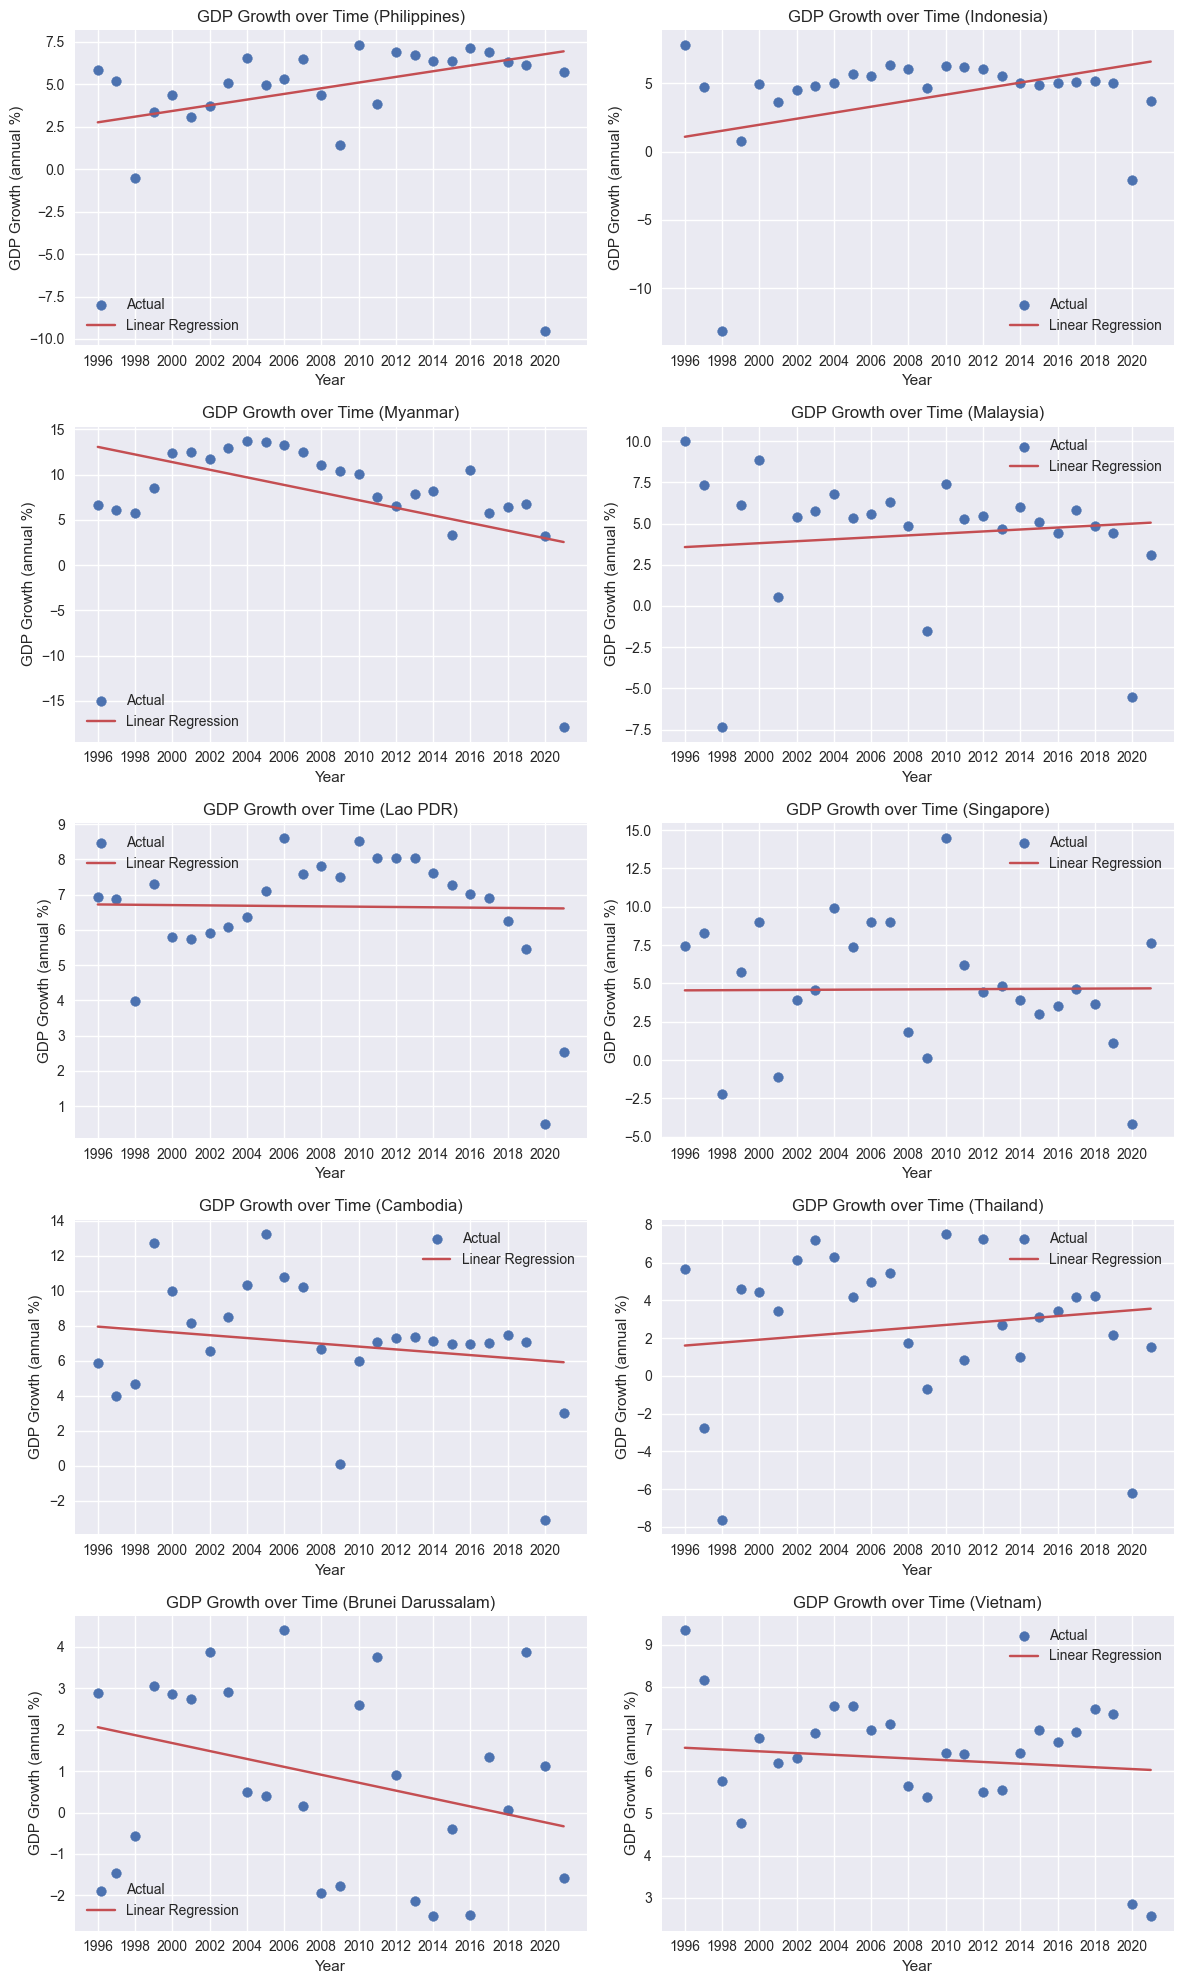

In [101]:
countries = df['Country Name'].unique()

# Set the size of the subplots
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# Iterate over each country and plot the linear regression
for i, country in enumerate(countries):
    # for ubplot position
    row = i % 5
    col = i // 5

    # Filter data for 'GDP growth (annual %)' and the current country
    gdp_growth_data = df[(df['Series Name'] == 'GDP growth (annual %)') & (df['Country Name'] == country)]

    # Predictor variable (Year) and target variable (GDP growth)
    years = df.columns[4:].astype(int)
    years = np.array(years)  # Convert to a NumPy array
    gdp_growth_values = gdp_growth_data.iloc[:, 4:].values.flatten()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(years.reshape(-1, 1), gdp_growth_values, test_size=0.2, random_state=42)

    # following the pseudocode regressor should be created and fit to the training set
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Generate predictions using the linear regression model
    predictions = regression_model.predict(X_test)

    # Plot the linear regression for the current country
    ax = axes[row, col]
    ax.scatter(years, gdp_growth_values, color='b', label='Actual')
    ax.plot(years, regression_model.predict(years.reshape(-1, 1)), color='r', label='Linear Regression')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP Growth (annual %)')
    ax.set_xticks(years[::2].astype(int))
    ax.set_title(f'GDP Growth over Time ({country})')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Load inflation dataset

In [102]:
df_inflation.head()

,Country Name,Country Code,Series Name,Series Code,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Brunei Darussalam,BRN,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.996137,1.711560,-0.441379,-0.415628,1.558152,0.595890,...,0.111766,0.389205,-0.207109,-0.488347,-0.278693,-1.260506,1.025052,-0.390522,1.940320,1.733414
1,Cambodia,KHM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,7.150861,7.960214,14.806504,4.008207,-0.791993,-0.600648,...,2.934316,2.941625,3.855689,1.223932,3.019140,2.912636,2.459085,1.942575,2.940295,2.920735
2,Indonesia,IDN,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,7.973281,6.226142,58.451044,20.477831,3.688619,11.500115,...,4.279500,6.412513,6.394925,6.363121,3.525805,3.808798,3.198346,3.030587,1.920968,1.560130
3,Lao PDR,LAO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,13.024416,27.508862,90.980735,125.272128,25.084641,7.811808,...,4.255127,6.371427,4.129243,1.277354,1.596912,0.825479,2.040393,3.322559,5.104073,3.755620
4,Myanmar,MMR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,16.275397,29.697233,51.487550,18.401043,-0.109166,21.101305,...,1.467583,5.643039,4.953299,9.454172,6.928825,4.572537,6.872329,8.825067,8.128567,7.563225


# Inflation Rate Comparison: Consumer Price Inflation (Annual %) of ASEAN member Country

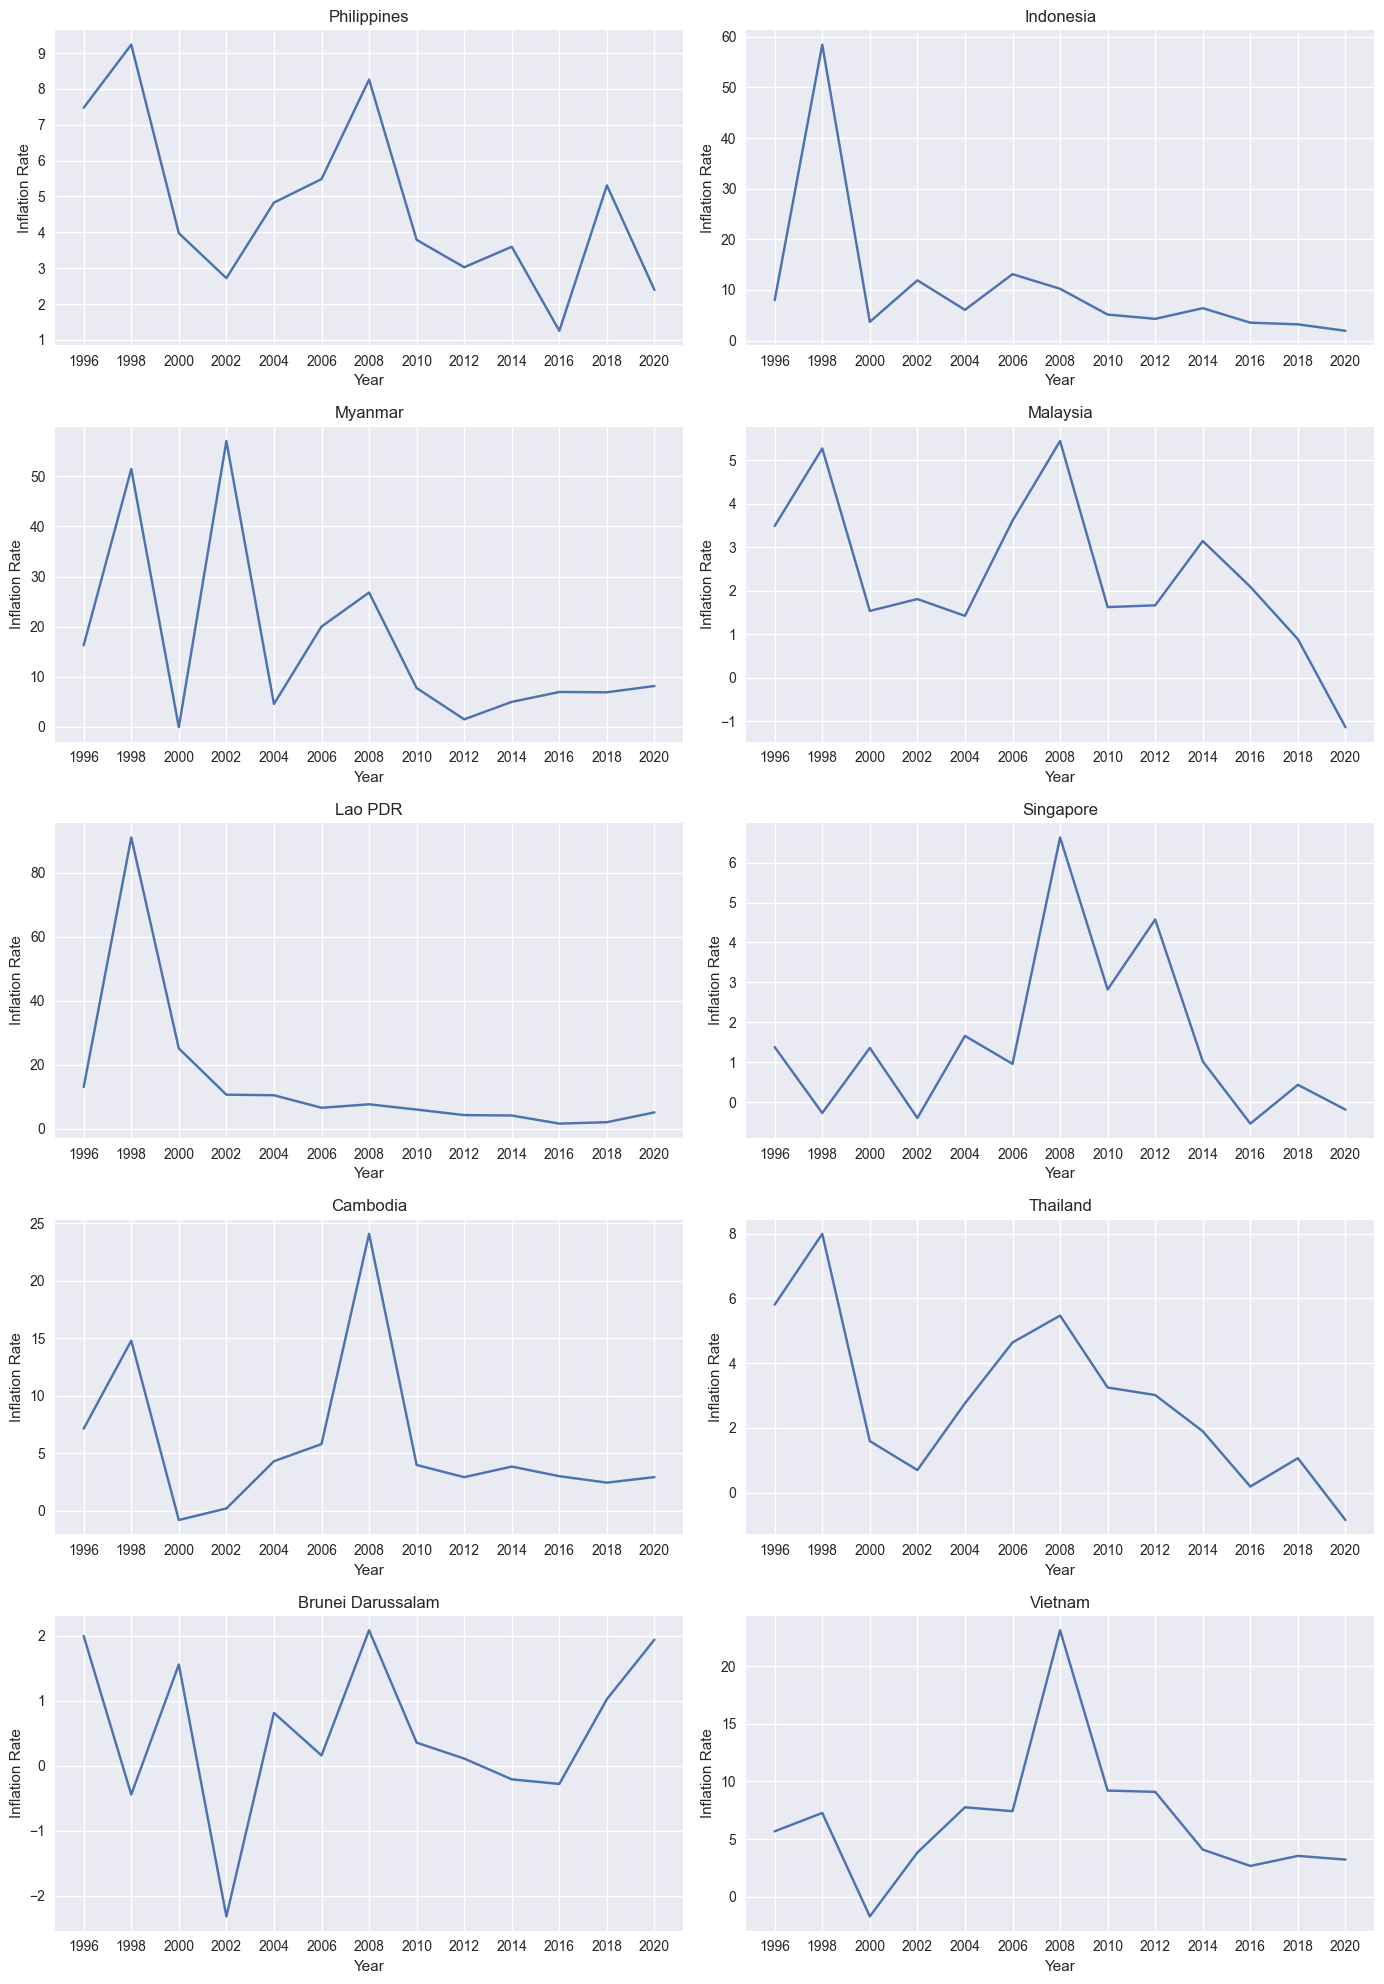

In [103]:
countries = df['Country Name'].unique()

num_rows = 5
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 20))

for i, country in enumerate(countries):
    # Subplot position
    row = i % num_rows
    col = i // num_rows
    
    ax = axes[row, col]
    
    # Filter data for country
    df_country = df_inflation[df_inflation['Country Name'] == country]
    
    # Extract the years and corresponding inflation values
    years = df_country.columns[4::2]  # Jump 2 years
    inflation_values = df_country.values.flatten()[4::2]  # Jump 2 years
    
    # line chart
    ax.plot(years, inflation_values)
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Inflation Rate')

plt.tight_layout()
plt.show()

In [104]:
#merge dataframe df and df_inflation
economic_indicators = pd.concat([df, df_inflation], axis=0, ignore_index=True)

In [105]:
economic_indicators

,Country Name,Country Code,Series Name,Series Code,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Philippines,PHL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,5.860348e+00,5.186412e+00,-5.140906e-01,3.346451e+00,4.382505e+00,3.049232e+00,...,6.896952e+00,6.750531e+00,6.347987e+00,6.348310e+00,7.149457e+00,6.930988e+00,6.341486e+00,6.118526e+00,-9.518295e+00,5.703156e+00
1,Philippines,PHL,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,3.331903e+00,2.620545e+00,-2.882087e+00,9.648508e-01,2.094019e+00,8.907429e-01,...,5.049330e+00,4.964801e+00,4.642336e+00,4.587218e+00,5.265571e+00,5.064393e+00,4.548701e+00,4.376526e+00,-1.097819e+01,4.135109e+00
2,Philippines,PHL,"Population, total",SP.POP.TOTL,7.094497e+07,7.271884e+07,7.449192e+07,7.624906e+07,7.795822e+07,7.962609e+07,...,9.803232e+07,9.970011e+07,1.013252e+08,1.030314e+08,1.048753e+08,1.067385e+08,1.085688e+08,1.103808e+08,1.121910e+08,1.138803e+08
3,Philippines,PHL,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.608000e+00,3.630000e+00,3.828000e+00,3.691000e+00,3.655000e+00,3.700000e+00,...,3.500000e+00,3.500000e+00,3.600000e+00,3.070000e+00,2.700000e+00,2.550000e+00,2.340000e+00,2.240000e+00,2.520000e+00,2.632000e+00
4,Myanmar,MMR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.686900e+00,6.034804e+00,5.761847e+00,8.478034e+00,1.241819e+01,1.246773e+01,...,6.485754e+00,7.898669e+00,8.199664e+00,3.277279e+00,1.050778e+01,5.750064e+00,6.404977e+00,6.750460e+00,3.173774e+00,-1.791294e+01
5,Myanmar,MMR,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,5.352354e+00,4.711717e+00,4.469078e+00,7.212541e+00,1.119202e+01,1.130310e+01,...,5.587393e+00,6.982302e+00,7.301181e+00,2.451781e+00,9.638069e+00,4.949194e+00,5.641937e+00,5.997337e+00,2.434131e+00,-1.848496e+01
6,Myanmar,MMR,"Population, total",SP.POP.TOTL,4.342337e+07,4.397205e+07,4.451618e+07,4.504164e+07,4.553833e+07,4.601483e+07,...,5.021818e+07,5.064833e+07,5.107244e+07,5.148395e+07,5.189235e+07,5.228834e+07,5.266601e+07,5.304021e+07,5.342320e+07,5.379808e+07
7,Myanmar,MMR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,6.920000e-01,6.990000e-01,7.030000e-01,6.830000e-01,6.540000e-01,6.560000e-01,...,7.310000e-01,7.220000e-01,7.230000e-01,7.700000e-01,9.940000e-01,1.360000e+00,7.700000e-01,4.100000e-01,1.480000e+00,1.840000e+00
8,Lao PDR,LAO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.928324e+00,6.872091e+00,3.967608e+00,7.306376e+00,5.798782e+00,5.751413e+00,...,8.026098e+00,8.026300e+00,7.611963e+00,7.270066e+00,7.022836e+00,6.892531e+00,6.247960e+00,5.457735e+00,5.030318e-01,2.528351e+00
9,Lao PDR,LAO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,4.458967e+00,4.659676e+00,2.057762e+00,5.434884e+00,4.029960e+00,4.049070e+00,...,6.491281e+00,6.521647e+00,6.153133e+00,5.753411e+00,5.408586e+00,5.264928e+00,4.646556e+00,3.892448e+00,-9.709414e-01,1.069380e+00


In [106]:
num_rows = economic_indicators.shape[0]
num_columns = economic_indicators.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 50
Number of columns: 30


In [107]:
series_to_drop = ['SP.POP.TOTL', 'NY.GDP.PCAP.KD.ZG']  # drop series
dropseries = economic_indicators[economic_indicators['Series Code'].isin(series_to_drop)]  # Select rows with 'Series Code' in the list
economic_indicators = economic_indicators.drop(dropseries.index).reset_index(drop=True)

In [108]:
economic_indicators.head()

,Country Name,Country Code,Series Name,Series Code,1996,1997,1998,1999,2000,2001,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Philippines,PHL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,5.860348,5.186412,-0.514091,3.346451,4.382505,3.049232,...,6.896952,6.750531,6.347987,6.348310,7.149457,6.930988,6.341486,6.118526,-9.518295,5.703156
1,Philippines,PHL,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.608000,3.630000,3.828000,3.691000,3.655000,3.700000,...,3.500000,3.500000,3.600000,3.070000,2.700000,2.550000,2.340000,2.240000,2.520000,2.632000
2,Myanmar,MMR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.686900,6.034804,5.761847,8.478034,12.418192,12.467730,...,6.485754,7.898669,8.199664,3.277279,10.507781,5.750064,6.404977,6.750460,3.173774,-17.912945
3,Myanmar,MMR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,0.692000,0.699000,0.703000,0.683000,0.654000,0.656000,...,0.731000,0.722000,0.723000,0.770000,0.994000,1.360000,0.770000,0.410000,1.480000,1.840000
4,Lao PDR,LAO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.928324,6.872091,3.967608,7.306376,5.798782,5.751413,...,8.026098,8.026300,7.611963,7.270066,7.022836,6.892531,6.247960,5.457735,0.503032,2.528351


Length of years array: 26
Length of unemployment array: 26
Length of inflation array: 26
Length of GDP growth array: 26


C:\Users\ASILO\AppData\Local\Temp\ipykernel_16788\3230604901.py:55: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


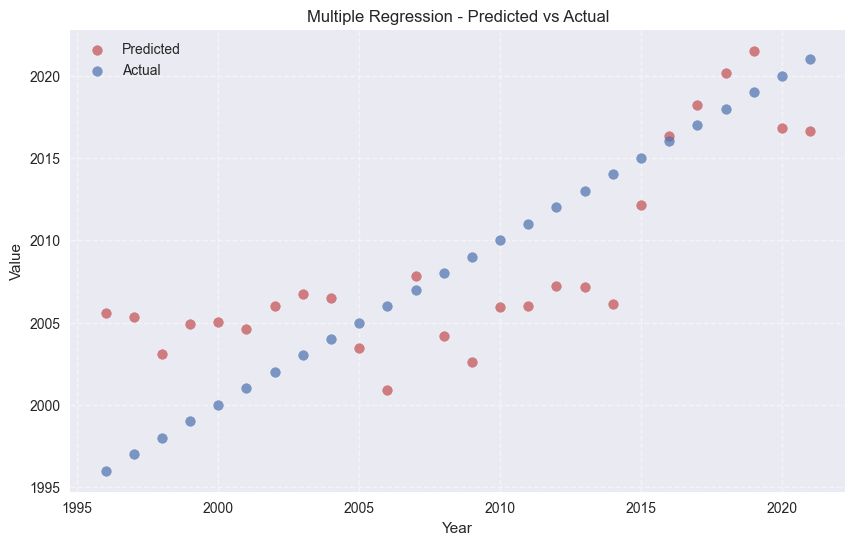

In [109]:
plt.style.use("seaborn-v0_8")
plt.style.use("seaborn-v0_8-whitegrid")
unemployment_data = economic_indicators[economic_indicators['Series Code'] == 'SL.UEM.TOTL.ZS']
inflation_data = economic_indicators[economic_indicators['Series Code'] == 'FP.CPI.TOTL.ZG']
gdp_growth_data = economic_indicators[economic_indicators['Series Code'] == 'NY.GDP.MKTP.KD.ZG']

years = economic_indicators.columns[4:].astype(int)

# Extract the numeric values and convert to floats
unemployment_values = unemployment_data.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').values.flatten()
inflation_values = inflation_data.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').values.flatten()
gdp_growth_values = gdp_growth_data.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').values.flatten()

# Determine the shortest length among the arrays
min_length = min(len(years), len(unemployment_values), len(inflation_values), len(gdp_growth_values))

# Trim the arrays to min
years = years[:min_length]
unemployment_values = unemployment_values[:min_length]
inflation_values = inflation_values[:min_length]
gdp_growth_values = gdp_growth_values[:min_length]
# Remove NaN values
unemployment_values = unemployment_values[~np.isnan(unemployment_values)]
inflation_values = inflation_values[~np.isnan(inflation_values)]
gdp_growth_values = gdp_growth_values[~np.isnan(gdp_growth_values)]

# Checking the lengths of the arrays
print("Length of years array:", len(years))
print("Length of unemployment array:", len(unemployment_values))
print("Length of inflation array:", len(inflation_values))
print("Length of GDP growth array:", len(gdp_growth_values))

# Ensure all arrays have the same length as years
length = min(len(unemployment_values), len(inflation_values), len(gdp_growth_values))
years = years[:length]
unemployment_values = unemployment_values[:length]
inflation_values = inflation_values[:length]
gdp_growth_values = gdp_growth_values[:length]


# Check if all arrays have non-zero lengths
if len(years) > 0 and len(unemployment_values) > 0 and len(inflation_values) > 0 and len(gdp_growth_values) > 0:
    # Create and fit the linear regression model
    regression_model = LinearRegression()
    independent_variables = pd.DataFrame({'Unemployment': unemployment_values,
                                          'Inflation': inflation_values,
                                          'GDP Growth': gdp_growth_values})
    regression_model.fit(independent_variables, years)

    # Generate predictions using the linear regression model
    predictions = regression_model.predict(independent_variables)

    # Set the plot size and style
    plt.figure(figsize=(10, 6))
    plt.style.use('seaborn')

    # Plot the scatter plot with regression line
    plt.scatter(years, predictions, color='r', label='Predicted', alpha=0.7)
    plt.scatter(years, years, color='b', label='Actual', alpha=0.7)

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Multiple Regression - Predicted vs Actual')

    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.5)

    # Customize legend
    plt.legend()
    plt.show()
else:
    print("Error: Arrays have different lengths or contain no data.")

In [110]:
gdp_growth_data =  economic_indicators[economic_indicators['Series Code'] == 'NY.GDP.MKTP.KD.ZG']

# Extract relevant columns (years) for the independent variable
years = economic_indicators.columns[4:]

# Prepare the predictor variable
gdp_growth_values = gdp_growth_data.iloc[:, 4:].values.flatten()

# Check the length of the GDP growth array
print("Length of GDP growth array:", len(gdp_growth_values))

Length of GDP growth array: 260


# Multiple Regression
#Can the year variable be used to predict changes in unemployment rate, GDP growth rate, or inflation rate? Is there a significant relationship between year and each of these variables in the regression model?

C:\Users\ASILO\AppData\Local\Temp\ipykernel_16788\1043846473.py:39: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


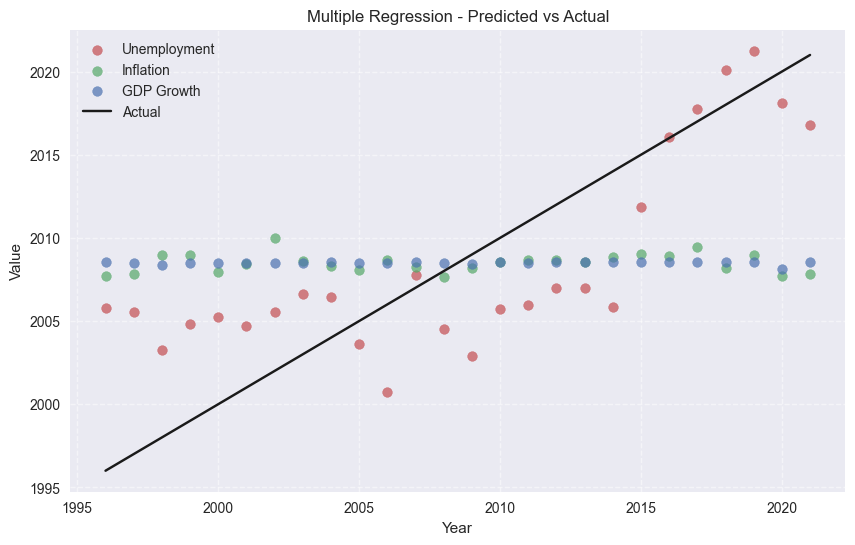

In [112]:
sns.set_theme(style='whitegrid')

unemployment_data = economic_indicators[economic_indicators['Series Code'] == 'SL.UEM.TOTL.ZS']
inflation_data = economic_indicators[economic_indicators['Series Code'] == 'FP.CPI.TOTL.ZG']
gdp_growth_data = economic_indicators[economic_indicators['Series Code'] == 'NY.GDP.MKTP.KD.ZG']


# Extract the relevant columns (years) for the independent variables
years = economic_indicators.columns[4:].astype(int)

# Extract the numeric values and convert them to floats
unemployment_values = unemployment_data.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').values.flatten()
inflation_values = inflation_data.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').values.flatten()
gdp_growth_values = gdp_growth_data.iloc[:, 4:].apply(pd.to_numeric, errors='coerce').values.flatten()

# Trim the arrays to the shortest length
min_length = min(len(years), len(unemployment_values), len(inflation_values), len(gdp_growth_values))
years = years[:min_length]
unemployment_values = unemployment_values[:min_length]
inflation_values = inflation_values[:min_length]
gdp_growth_values = gdp_growth_values[:min_length]

# Create and fit the linear regression models for each independent variable
regression_model_unemployment = LinearRegression()
regression_model_inflation = LinearRegression()
regression_model_gdp_growth = LinearRegression()

regression_model_unemployment.fit(unemployment_values.reshape(-1, 1), years)
regression_model_inflation.fit(inflation_values.reshape(-1, 1), years)
regression_model_gdp_growth.fit(gdp_growth_values.reshape(-1, 1), years)

# Generate predictions using the linear regression models
predictions_unemployment = regression_model_unemployment.predict(unemployment_values.reshape(-1, 1))
predictions_inflation = regression_model_inflation.predict(inflation_values.reshape(-1, 1))
predictions_gdp_growth = regression_model_gdp_growth.predict(gdp_growth_values.reshape(-1, 1))

# Set the plot size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')

# Plot the scatter plot with regression lines
plt.scatter(years, predictions_unemployment, color='r', label='Unemployment', alpha=0.7)
plt.scatter(years, predictions_inflation, color='g', label='Inflation', alpha=0.7)
plt.scatter(years, predictions_gdp_growth, color='b', label='GDP Growth', alpha=0.7)
plt.plot(years, years, color='k', label='Actual')


plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Multiple Regression - Predicted vs Actual')

plt.grid(True, linestyle='--', alpha=0.5)

plt.legend()

plt.show()

# Conclusion